In [12]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from pyuplift.data_processing import Econometric
from pyuplift.datasets import load_linear
from pyuplift.model_selection import treatment_cross_val_score, rmse_cross_val_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline

## Generate synthetic data

In [13]:
df = load_linear(100000)

In [14]:
df.head()

,x1,x2,x3,t,y
0,-4.682088,-0.479330,5.853140,1,-16.907571
1,-8.228249,0.152597,-9.560731,1,6.168450
2,-0.653801,0.796189,7.909909,1,-1.915019
3,-7.133619,-1.365698,-10.525031,1,-29.735355
4,9.063509,-1.006977,4.531767,1,14.568520


In [16]:
X, y, t = df.drop(['y', 't'], axis=1).values, df['y'].values, df['t'].values

## Models for tests

In [17]:
algorithms = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "SVM": LinearSVR(),
    "Naive Bayes": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor()
}

## Calculations of the treatment effect on different regression models

In [18]:
%%time
treat_methods, treat_scores = [], []
for key in algorithms:
    print(key)
    model = Econometric(algorithms[key])
    cur_scores = treatment_cross_val_score(X, y, t, model, cv=20)
    treat_methods.extend([key] * len(cur_scores))
    treat_scores.extend(cur_scores)
df_treat_stats = pd.DataFrame(data={'Method': treat_methods, 'Effect': treat_scores})

Linear Regression


SVM


Naive Bayes


Decision Tree


Random Forest


Gradient Boosting


Wall time: 8min 13s


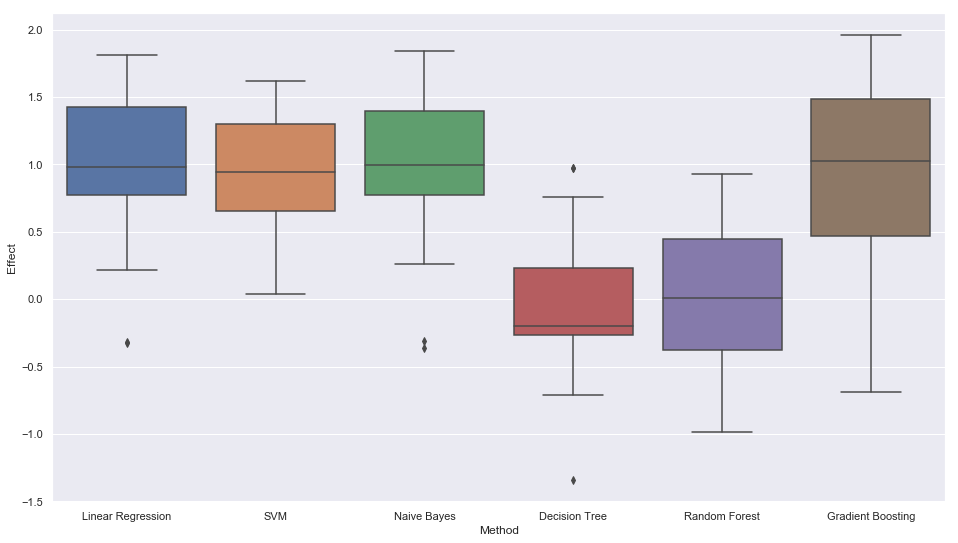

In [20]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (16, 9)})
ax = sns.boxplot(x="Method", y="Effect", data=df_treat_stats)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

## Calculations of the prediction error on different regression models

In [23]:
%%time
rmse_methods, rmse_scores = [], []
for key in algorithms:
    print(key)
    model = Econometric(algorithms[key])
    cur_scores = rmse_cross_val_score(X, y, t, model, cv=20)
    rmse_methods.extend([key] * len(cur_scores))
    rmse_scores.extend(cur_scores)
df_rmse_stats = pd.DataFrame(data={'Method': rmse_methods, 'RMSE': rmse_scores})

Linear Regression


SVM


Naive Bayes


Decision Tree


Random Forest


Gradient Boosting


Wall time: 7min 22s


## Cross validation RMSE

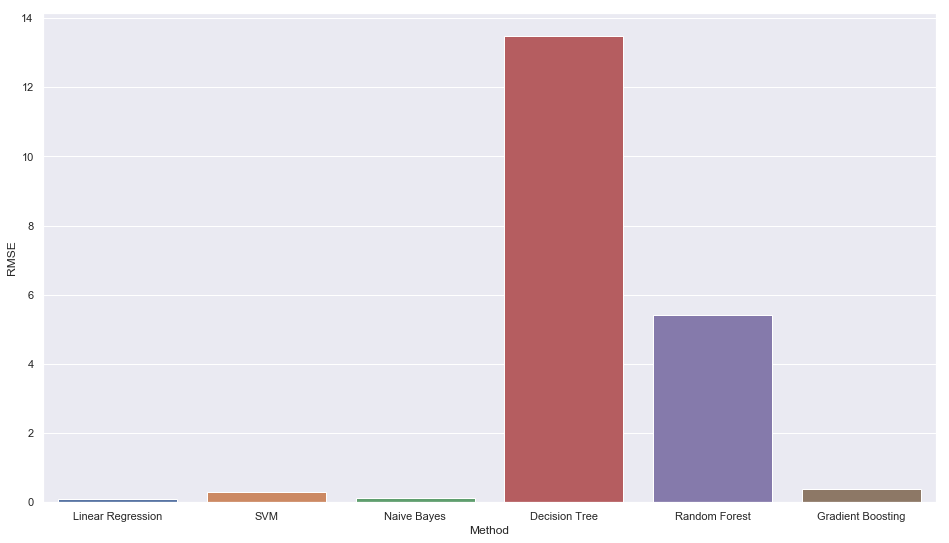

In [24]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (16, 9)})
ax = sns.barplot(x="Method", y="RMSE", data=df_rmse_stats, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

## Cross validation RMSE without decision tree and random forest

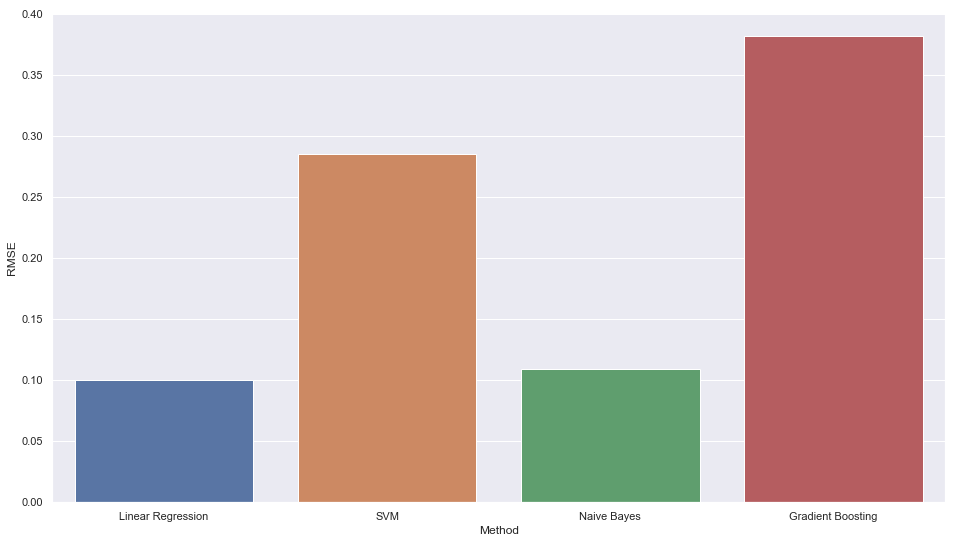

In [25]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (16, 9)})
ax = sns.barplot(
    x="Method", 
    y="RMSE", 
    data=df_rmse_stats[(df_rmse_stats['Method'] != 'Random Forest')&(df_rmse_stats['Method'] != 'Decision Tree')],
    ci=None
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);